In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
# importando o dataset
from sklearn.datasets import fetch_california_housing
casas = fetch_california_housing()

In [20]:
# transformando em um DataFrame
casas_df = pd.DataFrame(casas.data)
casas_df.columns = casas.feature_names
casas_df['MedHouseVal'] = casas.target
casas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# separando X e Y
X = casas_df.MedInc
y = casas_df.MedHouseVal

# separando em treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
# usando a regressão linear
reg = LinearRegression().fit(X_train.values.reshape(-1, 1),y_train)
y_pred = reg.predict(X_test.values.reshape(-1,1))

In [11]:
# avaliando o erro
absol_error = mean_absolute_error(y_test,y_pred)
squar_error = mean_squared_error(y_test,y_pred)
print(f"""
Mean Absolute Error: {absol_error}
Mean Squared Error: {squar_error}
""")


Mean Absolute Error: 0.6265986453094173
Mean Squared Error: 0.7028461448540977


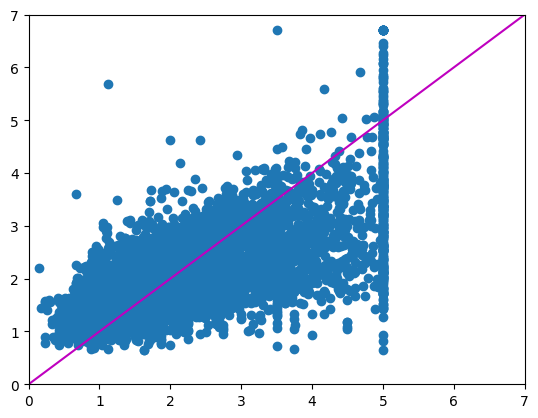

In [12]:
# visualizando graficamente a relação do target com o valor previsto
fig,ax = plt.subplots()

ax.scatter(y_test,y_pred)
ax.plot([0,7],[0,7],'m')

ax.set(xlim=(0,7),ylim=(0,7))
plt.show()

Agora faremos a regressão linear múltipla

In [14]:
# separando X e y
X = casas_df.drop('MedHouseVal',axis=1)
y = casas_df.MedHouseVal

# separando em treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [15]:
# Usando a regressão linear
reg2 = LinearRegression().fit(X_train,y_train)
y_pred2 = reg2.predict(X_test)

In [16]:
# avaliando o erro
absol_error = mean_absolute_error(y_test,y_pred2)
squar_error = mean_squared_error(y_test,y_pred2)
print(f"""
Mean Absolute Error: {absol_error}
Mean Squared Error: {squar_error}
""")


Mean Absolute Error: 0.5295710106684449
Mean Squared Error: 0.5369686543372462



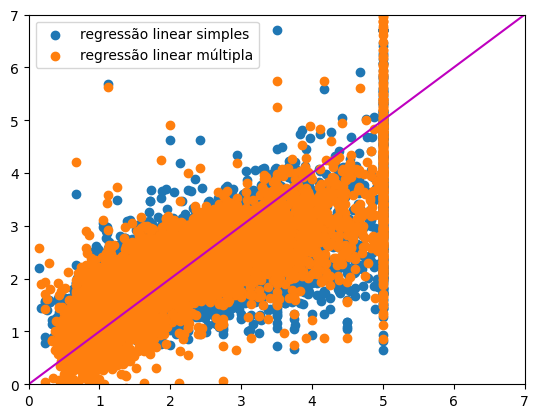

In [18]:
# visualizando o gráfico sobrepondo o desempenho da regressão simples com a múltipla
fig,ax = plt.subplots()

ax.scatter(y_test,y_pred, label = "regressão linear simples")
ax.scatter(y_test,y_pred2, label = "regressão linear múltipla")
ax.plot([0,7],[0,7],'m')

ax.set(xlim=(0,7),ylim=(0,7))
ax.legend()
plt.show()